<a href="https://colab.research.google.com/github/A01793509/Equipo_44/blob/main/Avance2_44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---


🚀 **Avance 2. Ingeniería de características**:

- Crear nuevas características para mejorar el rendimiento de los modelos.
- Mitigar el riesgo de características sesgadas y acelerar la convergencia de algunos algoritmos.

📑 **Asignatura:** Proyecto Integrador

📘 **Proyecto:** LunchForecast AI: Optimizador de reservas de almuerzos empresariales basado en inteligencia artificial.

📚 **Equipo:** 44

🧑 **Alumnos:**
> Alberto José García Porras (Matrícula No. **A01793509**)

>  Erick Johan Najera Olivero (Matrícula No. **A01793506**)

>  Carlos Julio León Caicedo (Matrícula No. **A01793947**)

👩 **Profesores**:
> Dra. Grettel Barceló Alonso

> Dr. Luis Eduardo Falcón Morales

> Dr. Guillermo Mota

📅 Mayo 12 del 2024

---

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import math
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

---
##👣**Obtener Datos**: Cargamos el archivo CSV con la información del consumo del casino desde enero del 2021 hasta marzo del 2024.
---

In [80]:
dfCasinoConsumo = pd.read_csv("DatosConsumoCasino.csv",sep=";")
print("**********************************************")
print(f"El conjunto de datos cargado inicialmente contiene {len(dfCasinoConsumo):,.2f} registros:")
print("**********************************************")

**********************************************
El conjunto de datos cargado inicialmente contiene 884,615.00 registros:
**********************************************


##🔎 **Matriz de Correlación**
#### Nombres de las variables y cantidad de datos nulos o vacios cargados en el DataFrame

In [81]:
# Mostrar las variables y la cantidad de datos nulos o vacios

print("**********************************************")
print("Variables del dataset y cantidad de datos nulos o vacíos:")
print("**********************************************")
print(dfCasinoConsumo.isnull().sum())
print("**********************************************")

**********************************************
Variables del dataset y cantidad de datos nulos o vacíos:
**********************************************
Consecutivo                   0
IdProducto                47786
cod lector                    0
Cod comedor                   0
Identificacion persona        0
Fecha Consumo                 0
Detalle                       0
Nro empleados                 0
Tipo Empleado                 0
Nivel                         0
Porcentaje apoyo              0
Invitado                      0
Ing x planta                  0
dtype: int64
**********************************************


#### Se utiliza la Moda para imputar los datos vacios del Dataframe de la variable IdProducto, en total eran 47.786 datos nulos

In [83]:
# Calculamos la moda de la columna 'IdProducto'
moda_id_producto = dfCasinoConsumo['IdProducto'].mode()[0]

# Imputamos los valores nulos con la moda
dfCasinoConsumo['IdProducto'].fillna(moda_id_producto, inplace=True)

# Verificación: contar cuántos valores nulos quedan después de la imputación
print("**********************************************")
print("Valores nulos en 'IdProducto' después de la imputación:", dfCasinoConsumo['IdProducto'].isnull().sum())

# Mostrar las variables y la cantidad de datos nulos o vacios
print("**********************************************")
print("Variables del dataset y cantidad de datos nulos o vacíos:")
print("**********************************************")
print(dfCasinoConsumo.isnull().sum())
print("**********************************************")

**********************************************
Valores nulos en 'IdProducto' después de la imputación: 0
**********************************************
Variables del dataset y cantidad de datos nulos o vacíos:
**********************************************
Consecutivo               0
IdProducto                0
cod lector                0
Cod comedor               0
Identificacion persona    0
Fecha Consumo             0
Detalle                   0
Nro empleados             0
Tipo Empleado             0
Nivel                     0
Porcentaje apoyo          0
Invitado                  0
Ing x planta              0
dtype: int64
**********************************************


### Ya no tenemos datos vacios o nulos en el conjunto de datos, por lo cual continuamos con la preparación de los datos y el analísis de Matriz de correlación

In [84]:
# --------------------------------------
# Preparación de los datos
# --------------------------------------

# Convertir la columna 'Fecha Consumo' a datetime
dfCasinoConsumo['Fecha Consumo'] = pd.to_datetime(dfCasinoConsumo['Fecha Consumo'], errors='coerce')

# Extraer el día de la semana (lunes=0, domingo=6)
dfCasinoConsumo['Dia de la semana'] = dfCasinoConsumo['Fecha Consumo'].dt.dayofweek

# Convertir a mayúsculas y filtrar para conservar solo las filas donde 'Detalle' es 'ALMUERZO'
dfCasinoConsumo['Detalle'] = dfCasinoConsumo['Detalle'].str.upper()
dfCasinoConsumo = dfCasinoConsumo[dfCasinoConsumo['Detalle'] == 'ALMUERZO'].copy()

# Conversión de variables categóricas a códigos numéricos
dfCasinoConsumo['Tipo Empleado'] = pd.Categorical(dfCasinoConsumo['Tipo Empleado']).codes
dfCasinoConsumo['Nivel'] = pd.Categorical(dfCasinoConsumo['Nivel']).codes
dfCasinoConsumo['Porcentaje apoyo'] = pd.Categorical(dfCasinoConsumo['Porcentaje apoyo']).codes

# Asegurarse que 'Nro empleados' es numérico
dfCasinoConsumo['Nro empleados'] = pd.to_numeric(dfCasinoConsumo['Nro empleados'], errors='coerce')

# Conteo de almuerzos por 'Día de la semana'
dfCasinoConsumo['Conteo Almuerzos'] = 1
almuerzos_por_dia = dfCasinoConsumo.groupby('Dia de la semana')['Conteo Almuerzos'].sum().rename('Número de Almuerzos_total_x_dia')

# Unir el total de almuerzos por día al DataFrame original
dfCasinoConsumo = dfCasinoConsumo.join(almuerzos_por_dia, on='Dia de la semana')

In [85]:
# Mostrar los datos únicos y cantidades de estas variables
# Dia de la semana, Conteo Almuerzos, Número de Almuerzos_total_x_dia

print("**********************************************")
print("Datos únicos y cantidades de las variables:")
print("**********************************************")

print("Día de la semana:")
print(dfCasinoConsumo['Dia de la semana'].value_counts().sort_values(ascending=True))

print("**********************************************")
print("Conteo Almuerzos:")
print(dfCasinoConsumo['Conteo Almuerzos'].value_counts().sort_values(ascending=True))

print("**********************************************")
print("Número de Almuerzos_total_x_dia:")
print(dfCasinoConsumo['Número de Almuerzos_total_x_dia'].value_counts().sort_values(ascending=True))

print("**********************************************")

**********************************************
Datos únicos y cantidades de las variables:
**********************************************
Día de la semana:
Dia de la semana
3.0    26107
0.0    28152
4.0    29194
6.0    29402
2.0    29852
5.0    29951
1.0    30132
Name: count, dtype: int64
**********************************************
Conteo Almuerzos:
Conteo Almuerzos
1    523885
Name: count, dtype: int64
**********************************************
Número de Almuerzos_total_x_dia:
Número de Almuerzos_total_x_dia
26107.0    26107
28152.0    28152
29194.0    29194
29402.0    29402
29852.0    29852
29951.0    29951
30132.0    30132
Name: count, dtype: int64
**********************************************


In [86]:
dfCasinoConsumo.head()

,Consecutivo,IdProducto,cod lector,Cod comedor,Identificacion persona,Fecha Consumo,Detalle,Nro empleados,Tipo Empleado,Nivel,Porcentaje apoyo,Invitado,Ing x planta,Dia de la semana,Conteo Almuerzos,Número de Almuerzos_total_x_dia
0,825979,2.0,0,1001,100001,2021-03-01,ALMUERZO,3486,2,8,0,0,1,0.0,1,28152.0
1,825980,2.0,0,1001,100002,2021-03-01,ALMUERZO,3486,0,1,2,0,1,0.0,1,28152.0
2,825981,2.0,0,1001,100003,2021-03-01,ALMUERZO,3486,2,8,0,0,1,0.0,1,28152.0
3,825982,2.0,1,1001,100004,2021-03-01,ALMUERZO,3486,2,8,2,0,1,0.0,1,28152.0
4,825983,2.0,0,1001,100005,2021-03-01,ALMUERZO,3486,0,8,0,0,1,0.0,1,28152.0


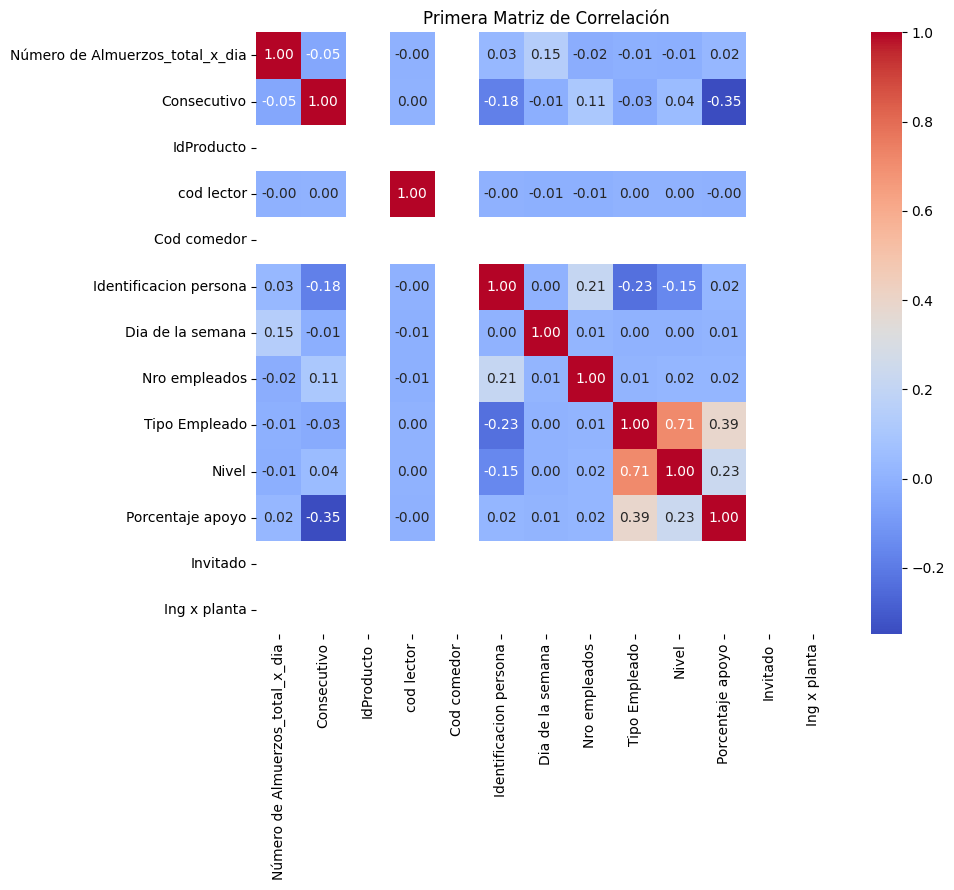

In [87]:
# Crear la matriz de correlación
columns_for_correlation = ['Número de Almuerzos_total_x_dia', 'Consecutivo', 'IdProducto', 'cod lector', 'Cod comedor',
                           'Identificacion persona', 'Dia de la semana', 'Nro empleados', 'Tipo Empleado',
                           'Nivel', 'Porcentaje apoyo', 'Invitado', 'Ing x planta']
correlation_matrix = dfCasinoConsumo[columns_for_correlation].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Primera Matriz de Correlación')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [88]:
print("*****************************************************************************************************************")
print(f"Ahora el DataFrame contiene {len(dfCasinoConsumo):,.2f} registros, dado que se Filtro en donde Detalle' es 'ALMUERZO'")
print("*****************************************************************************************************************")

*****************************************************************************************************************
Ahora el DataFrame contiene 523,885.00 registros, dado que se Filtro en donde Detalle' es 'ALMUERZO'
*****************************************************************************************************************


---
#####🔎 Al calcular y gráficar la **Primera Matriz de Correlación** se concluye que se deberán eliminar las siguientes variables de acuerdo con los siguientes análisis y conclusiones:
*   **Consecutivo:** Esta variable es un identificador único para cada registro en la base de datos, por lo cual no muestra una correlación significativa con las otras variables del dataset, excepto con *Porcentaje de apoyo*, finalmente esta variable no aportaría en la predicción del modelo.
*  **IdProducto:** No mostró ningún valor de correlación con las demás variables, al ser un identificador de producto, esta variable no es relevante para predecir el número de almuerzos a adquirir diariamente.
*  **cod lector:** Esta variable presenta un comportamiento similar a la variable "Consecutivo". Almacena el código del dispositivo de lectura del carnet, y efectivamente tampoco aportará al modelo predictivo a desarrollar.
*  **Cod comedor:** Esta variabla almacena el código asignado al comedor dentro de la instalación (Ubicación) y dado que el modelo predictivo no requiere la diferenciación por ubicación o localización, se debe omitir. Adicionalmente, la variable no presentó algún valor de correlación con las demás variables.
*  **Identificacion persona:** Esta variable es otro identificador que no tiene relevancia predictiva directa para el total de almuerzos.
*  **Detalle:** Esta variable no muestra correlaciones en la imagen y no será adecuada para la construcción del modelo. No obstantes a partir de esta variable se filtró el DataFrame para conservar solo las filas donde 'Detalle' es **'ALMUERZO'**, disminuyendo el número total de registros de 884.615 a 523.885.
*  **Invitado:** No mostró ningún valor de correlación con las demás variables, esta variable no es relevante para predecir el número de almuerzos a adquirir diariamente. Esta variable indica sí el consumidor es invitado en la empresa y adicionalmente esta variable solo almacena el valor '0' en todos los registros.
*  **Ing x planta:** No mostró ningún valor de correlación con las demás variables, esta variable no es relevante para predecir el número de almuerzos a adquirir diariamente. Esta variable indica sí el consumidor si el consumo se realzia en las instalaciones de la empresa y adicionalmente esta variable solo almacena el valor '1' en todos los registros.

#####Las variables "Invitado" y "Ing x planta" no tiene variación, dado que todos los valores son 0 o todos son 1, debido a esto, no se puede calcular una correlación estándar. La correlación requiere que haya alguna variabilidad en ambas variables que se están comparando.

#####Por lo anterior se sugieren eliminar estas variables y correr una Segunda Matriz de Correlación para continuar con la Ingenieria de Carácteristicas.
---

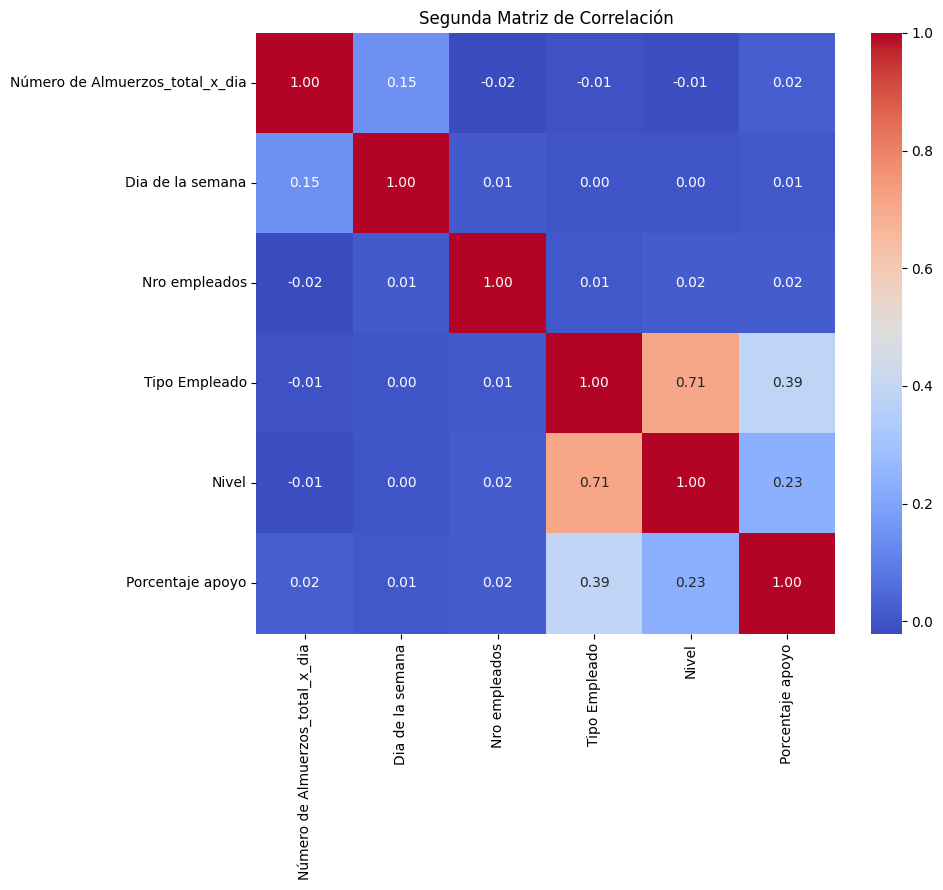

In [89]:
# Crear la matriz de correlación
columns_for_correlation = ['Número de Almuerzos_total_x_dia', 'Dia de la semana', 'Nro empleados',
                           'Tipo Empleado', 'Nivel', 'Porcentaje apoyo']
correlation_matrix = dfCasinoConsumo[columns_for_correlation].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Segunda Matriz de Correlación')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


---
#####🔎 Algunas de las conclusiones obtenidas al calcular la **Segunda Matriz de Correlación** entre las variables dependiente e independientes, fuerón:
*   La correlación entre **Número de Almuerzos y Día de la Semana (0.15)**:
Esta correlación es débilmente positiva, lo que sugiere una ligera tendencia a que, conforme avanza la semana, podría incrementarse el número de almuerzos, aunque el efecto es muy leve. Esta información puede ser útil, pero no es suficientemente fuerte como para influir significativamente en la planificación de los almuerzos durante la semana.
*   La variable **Detalle** almacena el tipo de comida así: ALMUERZO, CENA, COMIDA, DESAYUNO, MERIENDA AM, MERIENDA PM, REFRIGE PM, REFRIGERIO ESPECIAL PM, y dado que se requiere obtener las cantidades correctas para el servicio de almuerzo del personal y así contribuir a que se reduzca considerablemente el  desperdicio de alimentos en la empresa, se opta por Filtrar el DataFrame para conservar solo las filas donde 'Detalle' es 'ALMUERZO'. De igual manera se observo en la correlación con todos los datos de **la variable Detalle no tenía una incidencia en la correlación, si no que sus valores fueron muy bajos**, por ello se procede a eliminarla de la correlación.
*   Existe una fuerte correlación positiva entre el **Tipo de empleado y su Nivel jerárquico (0.71)**. Esto sugiere que las categorías de empleados están alineadas o son dependientes de los niveles jerárquicos dentro de la organización.
*    Hay una correlación moderada (0.39) entre el **Tipo Empleado** y el **Porcentaje apoyo** que reciben para los almuerzos. Esto puede indicar que diferentes tipos de empleados reciben diferentes niveles de subsidios para las comida, lo cual puede influir en su decisión de almorzar en el comedor de la empresa.
*   Las bajas correlaciones entre el número de empleados y las otras variables, indican que simplemente **más empleados activos en la fecha del consumo no garantiza un aumento o disminución proporcional en el uso del comedor**, lo que sugiere que otros factores contextuales o personales están en juego.
---